# Decision Tree
   ### 정의
   - 트리 모델
   - 각 노드의 기준을 통해 자식 노드로 내려가는 형태
  ### 특징 
   - 차원을 조절해줄 필요가 없다.
   - 결측값(NA, NaN)을 따로 처리해줄 필요가 없다.(결측값이 있는 값들의 다른 분할에 대한 Gain,Gini_index를 보고 채워넣음)
   - 설명력이 강하다.
   - Feature Importance를 제공
   - 과적합 되기 쉬운 모델이므로 tree의 깊이, leaf의 개수 등을 잘 정의해야된다.(하이퍼파라미터 튜닝이 중요) 
    
  ### 계산 방법(Classification변수에 대한 계산법만 기제)
   - information entrop : purity(순도)를 측정할때 자주 사용하는 지표.(Ent(D)가 작을수록 purity는 높다)
$$  Ent(D) = - \sum_{k = 1}^y p_k log_2 p_k, ( p_k : k 번째 class 의 비율, y: class의 개수) $$
   - information Gain : 노드를 분할할 때 기준속성을 정하는  지표 (Gain의 크기로 분할)
$$  Gain(D,a) = Ent(D) - \sum_{v = i}^V \frac{D^v}{D} Ent(D^v), (a: 속성) $$
     - Gain(D,a)는 각 노드마다 한개의 샘플(ex. a={True,False}일때 a = True만 고려)만 포함 하고있으므로 일반화 성능이 저조하다.
       따라서 새로운 샘플에 대해 유효한 예측을 할 수 없다.
   - Gini index : purity(순도)를 측정할때 자주 사용하는 지표.
$$  Gini(D) = 1- \sum_{k = 1}^y p_k ^2, ( p_k : k 번째 class 의 비율, y: class의 개수) $$
$$  Gini.index(D,a) = \sum_{v = 1}^V  \frac{D^v}{D} Gini(D^v), (a: 속성) $$
   
  ### 다변량 의사결정 트리 
  - 속성을 다변량을 만들어 예측하기 (ex) -0.8 x 밀도 + 0.4 x 당도 < 0.33)
  
  ###  Parameter
  - criterion : {“gini”, “entropy”} (기본값: 'gini')(classification)
  - criterion : {“mse”, “friedman_mse”, “mae”, “poisson”} (기본값: 'mse') (regr)
  
  - splitter: {“best”, “random”} (기본값: 'best'), 각 노드에서 분할을 선택하는 데 사용.
  
      - random: 최상의 무작위 분할(Extra tree)
      - best : 최적의 분할
  
  - max_depth: int, tree의 최대 깊이  (기본값 : None)
  - min_sample_split: int or float ,최소 샘플 분할  (기본값 : 2), 내부 노드를 분할하는 데 필요한 최소 샘플(데이터) 수
  - min_impurity_decrease: int or float, 노드를 분할 하기 위한 최소 감소량(Gain or Gini_index) (기본값 :1)
  
  - min_samples_leaf : int or float (기본값 : 1)
      - 리프 노드에 있어야하는 최소 샘플(데이터) 수
      - 특히 회귀에서 모델을 평활화하는 효과가 있을 수 있다.
  
  - min_weight_fraction_leaf : int or float (기본값 : 0)
      - 리프 노드에 있어야하는 (모든 입력 샘플의) 총 가중치의 최소 가중치 비율
  
  - max_features : int or float or {“auto”, “sqrt”, “log2”} (기본값: None) 
      - 최상의 분할을 찾을 때 고려할 속성 수  

  - max_leaf_nodes : int (기본값 : None)
      - leaf_node의 최대 개수
 
  - class_weight
  

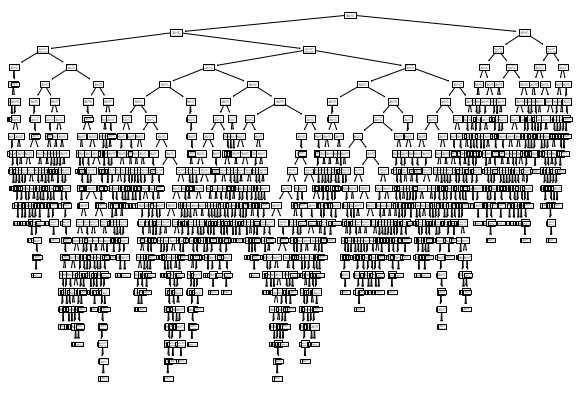

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target,test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_input,train_target)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

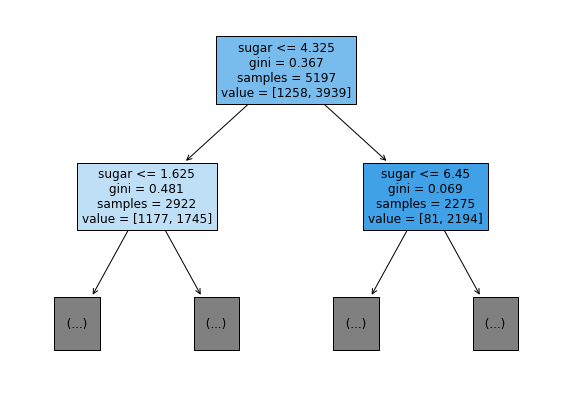

In [2]:
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth=1, filled= True, feature_names=['alcohol','sugar','pH'])
plt.show()

## Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
covid = pd.read_csv('PatientInfo.csv')

In [3]:
covid

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,itaewon_contact
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,False
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,False
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,False
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,False
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released,False
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated,False
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released,False
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released,False


In [4]:
covid19 = covid[['sex','birth_year','confirmed_date','released_date','province']]

In [7]:
covid_ = covid19.dropna()

In [14]:
import datetime 

In [46]:
covid_['released_date'] = pd.to_datetime(covid_['released_date'],format = '%Y-%m-%d')
covid_['confirmed_date'] = pd.to_datetime(covid_['confirmed_date'],format = '%Y-%m-%d')

<ipython-input-46-9581a5878dc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_['released_date'] = pd.to_datetime(covid_['released_date'],format = '%Y-%m-%d')
<ipython-input-46-9581a5878dc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_['confirmed_date'] = pd.to_datetime(covid_['confirmed_date'],format = '%Y-%m-%d')


In [47]:
covid_['date'] = covid_['released_date'] - covid_['confirmed_date']

<ipython-input-47-d608d1bb9a76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_['date'] = covid_['released_date'] - covid_['confirmed_date']


In [48]:
covid_

,sex,birth_year,confirmed_date,released_date,province,date
0,male,1964,2020-01-23,2020-02-05,Seoul,13 days
1,male,1987,2020-01-30,2020-03-02,Seoul,32 days
2,male,1964,2020-01-30,2020-02-19,Seoul,20 days
3,male,1991,2020-01-30,2020-02-15,Seoul,16 days
4,female,1992,2020-01-31,2020-02-24,Seoul,24 days
...,...,...,...,...,...,...
3990,male,1998,2020-02-20,2020-03-23,Jeju-do,32 days
3991,female,1998,2020-02-22,2020-03-07,Jeju-do,14 days
3992,female,1972,2020-03-02,2020-03-15,Jeju-do,13 days
3993,male,1974,2020-03-04,2020-03-21,Jeju-do,17 days


In [49]:
data = covid_[['birth_year','province','date']]
target = covid_['sex']

In [50]:
data['birth_year'] = data['birth_year'].astype('int')

<ipython-input-50-3700f5d286d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['birth_year'] = data['birth_year'].astype('int')


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 3996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   birth_year  1225 non-null   int32          
 1   province    1225 non-null   object         
 2   date        1225 non-null   timedelta64[ns]
dtypes: int32(1), object(1), timedelta64[ns](1)
memory usage: 33.5+ KB


In [54]:
target

0         male
1         male
2         male
3         male
4       female
         ...  
3990      male
3991    female
3992    female
3993      male
3996    female
Name: sex, Length: 1225, dtype: object

In [61]:
data.drop(['province'],axis = 1,inplace = True)

C:\anan\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
data['date'] = pd.to_numeric(data['date'])

<ipython-input-64-5a0aaa82d8a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_numeric(data['date'])


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 3996
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   birth_year  1225 non-null   int32
 1   date        1225 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 23.9 KB


In [68]:
1123200000000000 / 24 / 60/ 60

13000000000.0

## 기본값

In [70]:
from sklearn.model_selection import train_test_split
X , test_x , y, test_y = train_test_split(data,target, random_state = 10)

In [71]:
dt = DecisionTreeClassifier()
dt.fit(X,y)
print(dt.score(X,y))
print(dt.score(test_x,test_y))

0.9281045751633987
0.5472312703583062


In [76]:
dt = DecisionTreeClassifier(max_depth=100)
dt.fit(X,y)
print(dt.score(X,y))
print(dt.score(test_x,test_y))

0.9281045751633987
0.5407166123778502


In [78]:
import matplotlib.pyplot as plt

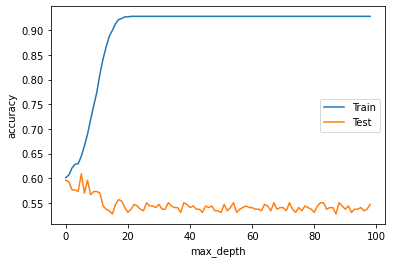

In [79]:
train_score = []
test_score = []
for _ in range(1,100):
    dt = DecisionTreeClassifier(max_depth=_)
    dt.fit(X,y)
    train_score.append(dt.score(X,y))
    test_score.append(dt.score(test_x,test_y))
    
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

## Ramdom Search

In [106]:
from scipy.stats import uniform,randint
params = {'min_impurity_decrease': uniform(0.0001,0.001),
          'min_samples_split': range(2,25),
          'min_samples_leaf': range(1,25)}

In [107]:
from sklearn.model_selection import RandomizedSearchCV
rd = RandomizedSearchCV(DecisionTreeClassifier(random_state=10),params, n_iter = 100,random_state = 42)
rd.fit(X,y)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=10),
                   n_iter=100,
                   param_distributions={'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FEB575BF10>,
                                        'min_samples_leaf': range(1, 25),
                                        'min_samples_split': range(2, 25)},
                   random_state=42)

In [108]:
print(rd.best_params_)

{'min_impurity_decrease': 0.0010004180571633304, 'min_samples_leaf': 23, 'min_samples_split': 10}


In [109]:
print(np.max(rd.cv_results_['mean_test_score']))

0.5849667379425042


In [112]:
dt = DecisionTreeClassifier(max_depth=5,min_impurity_decrease = 0.0010004180571633304, min_samples_leaf= 23, min_samples_split = 10 )
dt.fit(X,y)
print(dt.score(test_x,test_y))

0.5798045602605864


## Pruning(가지치기)
  - 너무 많은 가지를 만들어 과적합에 빠지는 것을 방지
  - ccp_alpha 매개변수를 통해 지정해 줄수있다. 이때 ccp의 값이 클수록 가지를 많이 제거 한다고 할 수있다.
  - tree 의 복잡도를 낮출수 있다,.

In [7]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

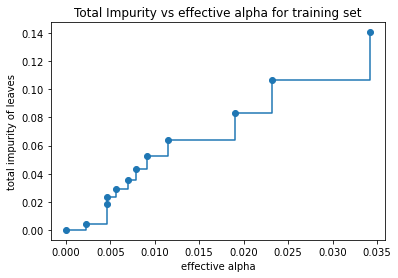

In [3]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [4]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


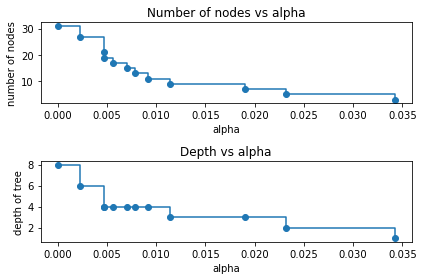

In [5]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

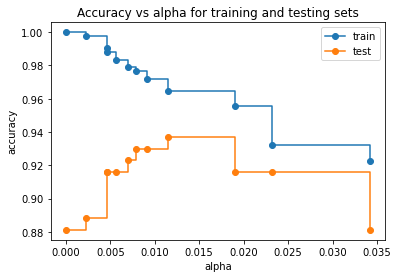

In [6]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()